In [126]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import re
%matplotlib inline

In [127]:
FLOWPRM_FILE = 'flow.prm'

In [128]:
def read_params():
    return open(FLOWPRM_FILE).read()

In [129]:
def modify_param(param, new):
    flowprm = read_params()
    open('%s.bak' % FLOWPRM_FILE, 'w').write(flowprm)
    
    param_line = r' params%{0}={{0}},\n'.format(param)
    pattern = param_line.format('.*')
    if re.search(pattern, flowprm) is None:
        print('Could not find a match for \n%s' % pattern)
        return
    
    newflowprm = re.sub(
        pattern=pattern.format('.*'),
        repl=param_line.format(str(new)),
        string=flowprm)
    open(FLOWPRM_FILE, 'w').write(newflowprm)

In [130]:
def run():
    cmd = './q1d.out'
    proc = subprocess.Popen(cmd, shell=True, 
                            stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out = proc.stdout.read().decode()
    err = proc.stderr.read().decode()
    if err:
        return err
    return out

In [131]:
def read_data():
    state_file = 'state.csv'
    with open(state_file) as f:
        cols = f.readline().split()
    state = np.genfromtxt(state_file, skip_header=1, names=cols)
    residuals = np.genfromtxt('residuals.csv')
    return state, residuals

In [132]:
def calc_mach(state):
    return state['u']/state['c']

In [133]:
PLOT_KWARG = dict(
    linestyle='solid',
    marker='.'
)
              
def plot_mach(state, ax, title_args=None, **kwargs):
    PLOT_KWARG.update(**kwargs)
    mach = calc_mach(state)
    ax.plot(state['x'], mach, **PLOT_KWARG)
    ax.set_ylabel('$M$')
    ax.set_xlabel('$x$')
    title = 'Mach Number distribution'
    if title_args:
        title += title_args
    ax.set_title(title)
    
def plot_residual(residuals, ax, title_args=None, **kwargs):
    PLOT_KWARG.update(**kwargs)
    ax.semilogy(residuals, **PLOT_KWARG)
    ax.set_ylabel('Residuals')
    ax.set_xlabel('Iterations')
#     ax.set_ylim(0, 1)
    title = 'Convergence of density residual'
    if title_args:
        title += title_args
    ax.set_title(title)
    
def plot_pressure(state, ax, title_args=None, **kwargs):
    PLOT_KWARG.update(**kwargs)
    ax.plot(state['x'], state['p'], **PLOT_KWARG)
    ax.set_ylabel('$P$')
    ax.set_xlabel('$x$')
    title = 'Pressure distribution'
    if title_args:
        title += title_args
    ax.set_title(title)

In [134]:
print read_params()

&dat
 params%flx_scheme=4,
 params%timestep_scheme=1,
 params%nx=50,
 params%p_exit_ratio=0.8,
 params%eps=0.5,
 params%tol=1e-15,
 params%max_iter=5000,
 params%cfl=0.4/



In [135]:
modify_param('max_iter', 5000)
modify_param('p_exit_ratio', 0.8)
modify_param('nx', 50)

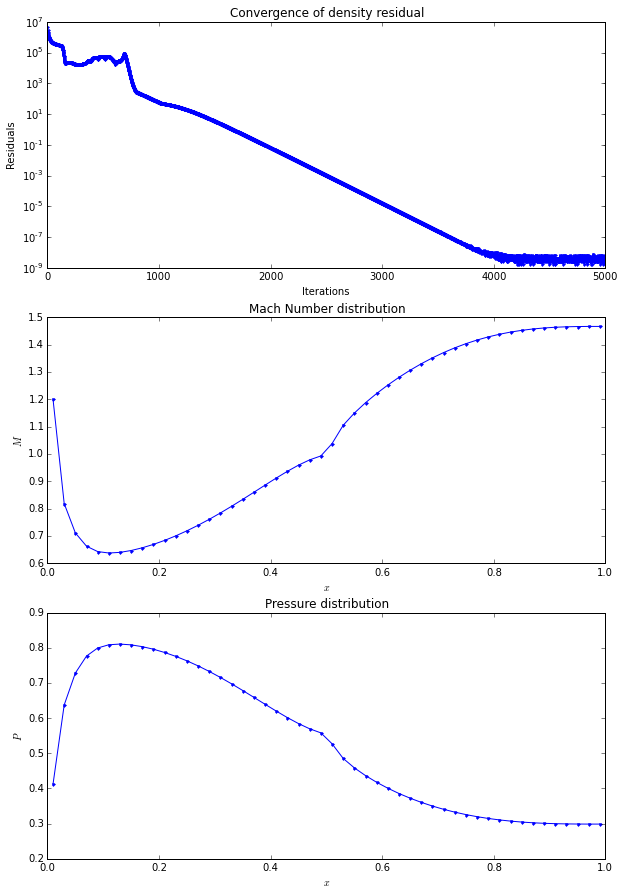

In [136]:
modify_param('flx_scheme', 2)
modify_param('eps', 1)
run()
state, resi = read_data()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
plot_residual(resi, ax1)
plot_mach(state, ax2)
plot_pressure(state, ax3)

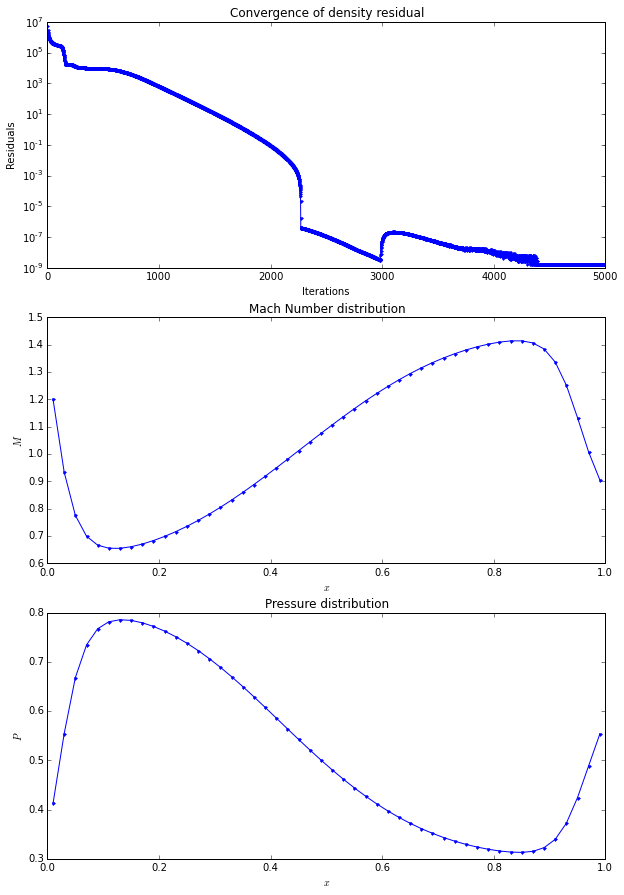

In [137]:
modify_param('flx_scheme', 3)
modify_param('eps', 1000)
run()
state, resi = read_data()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
plot_residual(resi, ax1)
plot_mach(state, ax2)
plot_pressure(state, ax3)

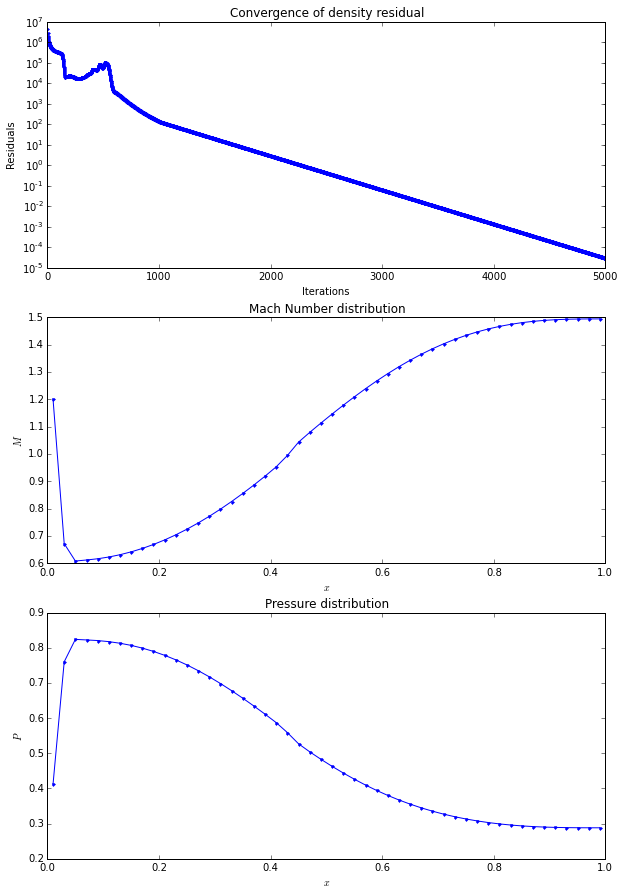

In [139]:
modify_param('flx_scheme', 4)
modify_param('eps', 0.5)
run()
state, resi = read_data()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
plot_residual(resi, ax1)
plot_mach(state, ax2)
plot_pressure(state, ax3)

 Number of iterations:
          98
 Error
   0.0000000000000000     



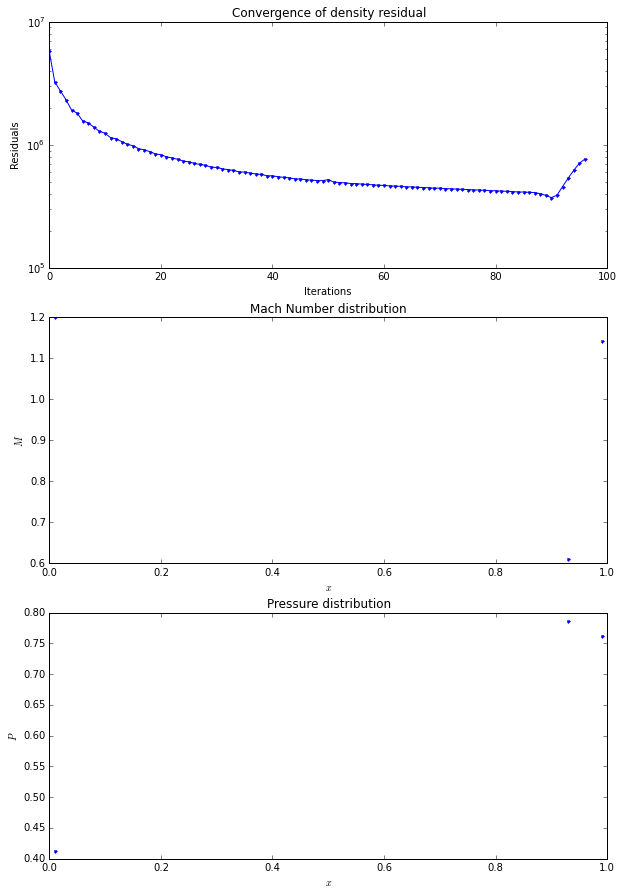

In [143]:
modify_param('flx_scheme', 5)
modify_param('eps', 0.5)
print run()
state, resi = read_data()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 15))
plot_residual(resi, ax1)
plot_mach(state, ax2)
plot_pressure(state, ax3)